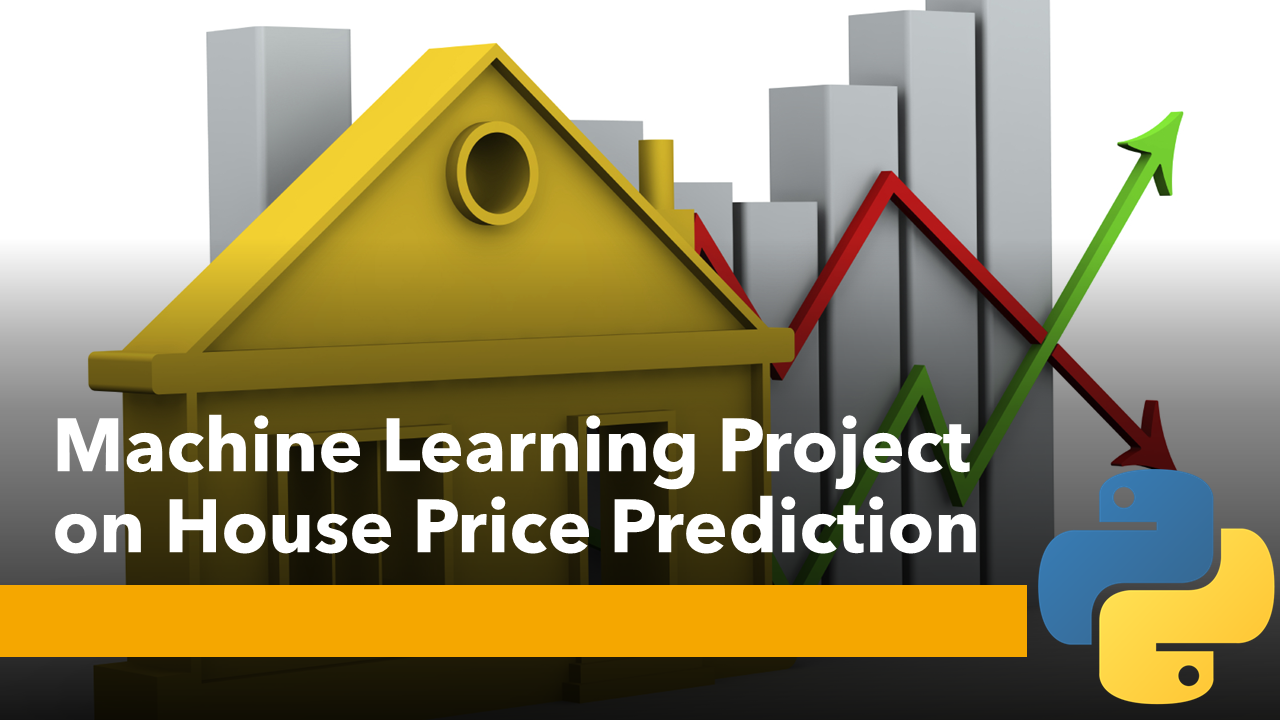

# APPROACH

---




1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
      1. ***Missing values:*** Impute all missing values using Mean, Median and Mode
      2. ***Inconistent values:*** Replace all inconsistence with consistent("NA" or "Unknown" )
      3. ***Outliers:*** Transform or let algorithm deal
4. Data Visualization
5. Data Analysis
      1. ***Uni-Variant Analysis:*** Mean, Median, Mode, Skewness
      2. ***Bi-Varient Analysis:*** Correlation, Covariance, Chi-square test
      3. ***Multi-Varient Analysis:***
        1. Classification
        2. Apply all Classification model
        3. Evaluate which is the better model
       


## IMPORTING LIBRARIES



---






In [ ]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

## AUDITING DATA

---



In [ ]:
# Importing data
df = pd.read_csv("data.csv")

In [ ]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# Univarient Analysis

df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
# Checking the missing values

df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

There is no missing value, Data is clean.

## DATA MANIPULATION


---


In [ ]:
# Dropping the unwanted columns

df.drop('date',inplace = True,axis=1)

In [ ]:
# Checking the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)
memory usage: 611




## DATA VISUALISATION


---


/var/folders/cz/19f3knhn6lbc4b43v3m3z8l80000gn/T/ipykernel_26803/4134178018.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='0.1f',cmap="PuBuGn")


<Axes: >

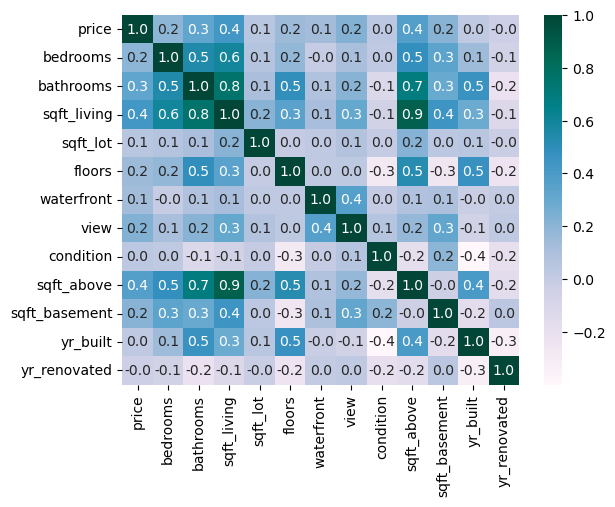

In [ ]:
# To see the correlation of the data - BiVarient Analysis

sns.heatmap(df.corr(),annot=True,fmt='0.1f',cmap="PuBuGn")

<h4> Top 3 Positively Correlated columns : </h4>
<br>
<li> sqft_above and sqft_living is highly correlated about 0.9. </li>
<li> Then, sqft_living and bathrooms - 0.8 </li>
<li> sqft_above and bathrooms - 0.7 </li>
<br>

Text(0.5, 1.0, 'Sales Price')

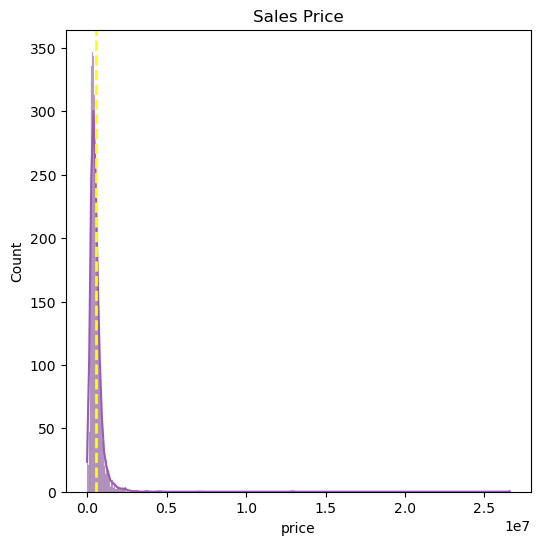

In [ ]:
# Distribution of the target variables
plt.figure(figsize=(6,6))
sns.histplot(df['price'], kde=True,color='#9b59b6')
plt.axvline(x=df['price'].mean(),color='yellow',linestyle='--', linewidth=2)
plt.title('Sales Price')

In [ ]:
df['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

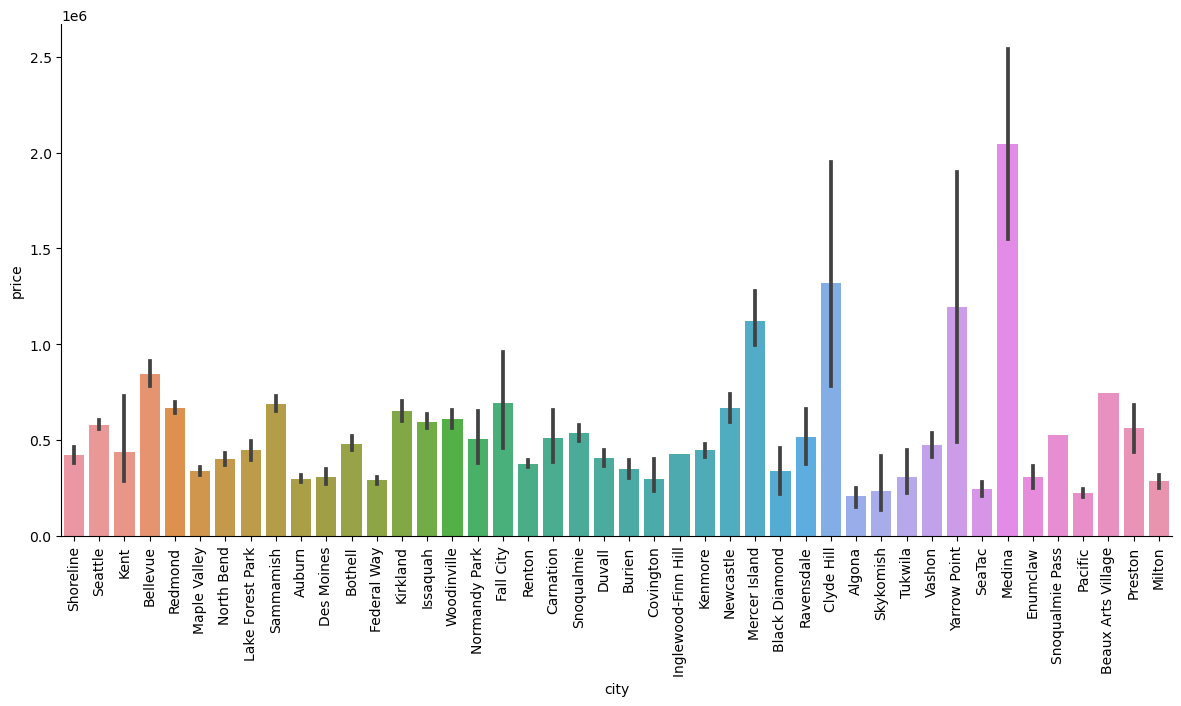

In [ ]:
sns.catplot(data=df,x='city',y='price',kind='bar' ,height=6, aspect=2)
plt.xticks(rotation=90)
plt.show()

In [ ]:
rank = df['condition'].sort_values().unique()
print(rank)
print('Here ranking scale is out',len(rank),'.')
print('5 represents the highest ranking and 1 is the least ranking of the house condition')

[1 2 3 4 5]
Here ranking scale is out 5 .
5 represents the highest ranking and 1 is the least ranking of the house condition


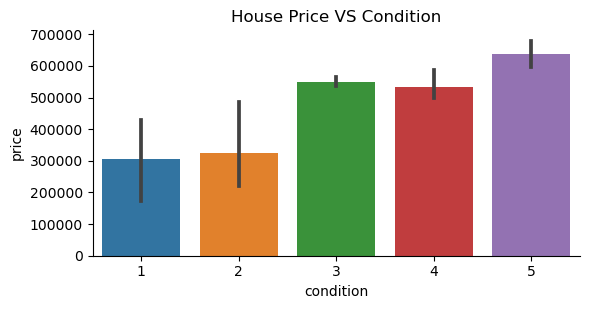

In [ ]:
# Distribution of price with condition
sns.catplot(data=df,x='condition',y='price',kind='bar' ,height=3, aspect=2)
plt.title('House Price VS Condition')
plt.show()

Best the condition is higher the price would be.

In [ ]:
# Getting only the numeric columns

num_cols = df.select_dtypes(include='number')
print(num_cols)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3    

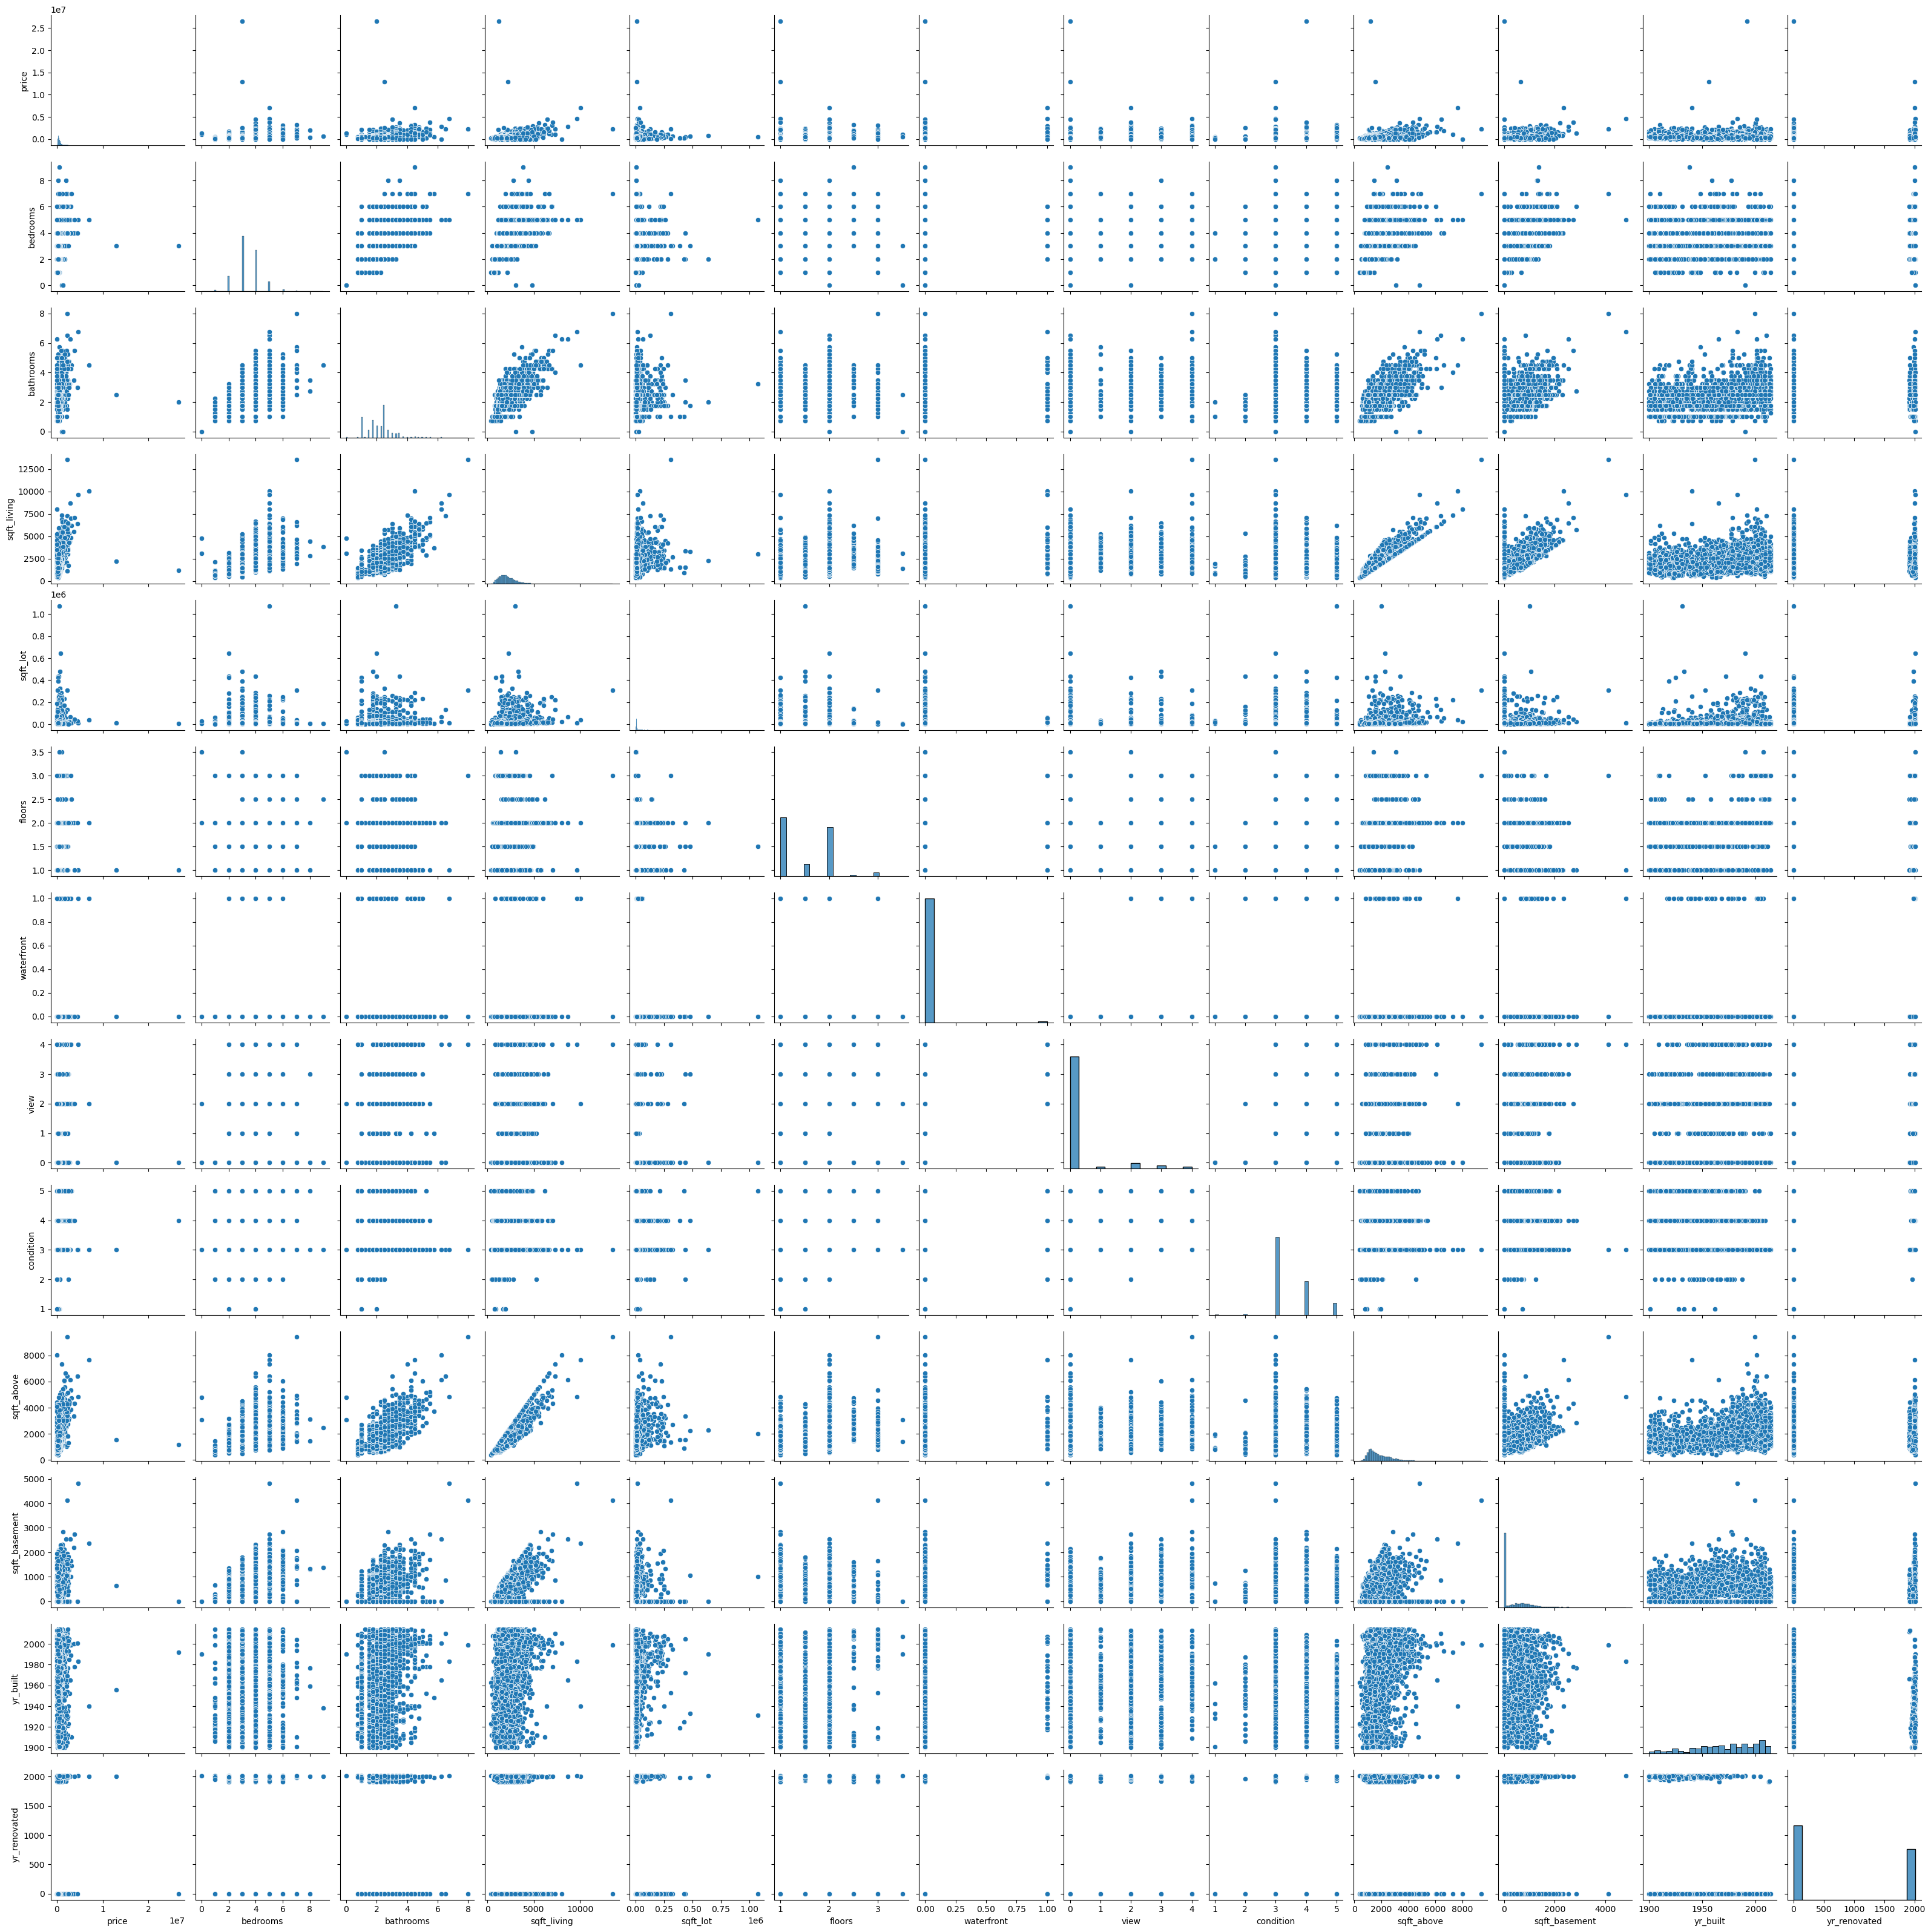

In [ ]:
sns.pairplot(num_cols)

## OUTLIER ANALYSIS


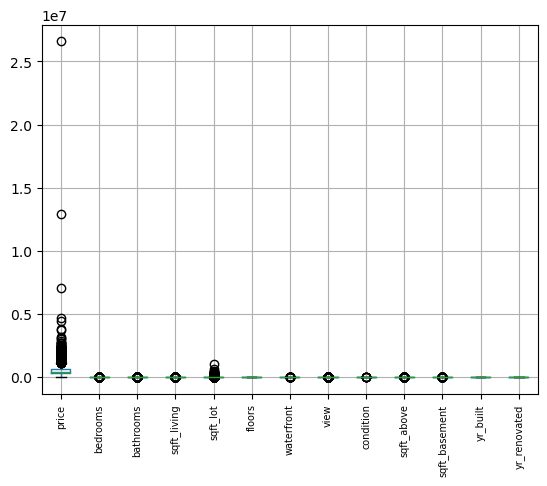

In [ ]:
# Visualising outlier of Numerical columns
num_cols.boxplot()
plt.xticks(rotation=90,fontsize=7)
plt.show()

In [ ]:
df.skew()

/var/folders/cz/19f3knhn6lbc4b43v3m3z8l80000gn/T/ipykernel_26803/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


price            24.790933
bedrooms          0.456447
bathrooms         0.616033
sqft_living       1.723513
sqft_lot         11.307139
floors            0.551441
waterfront       11.682901
view              3.341586
condition         0.959068
sqft_above        1.494211
sqft_basement     1.642732
yr_built         -0.502155
yr_renovated      0.385919
dtype: float64

In [ ]:
# Outlier Treatment

# replacing 0's with 0.0001 for log transformation
df.replace(0,0.0001,inplace=True)

#Transforming all values using log method
for i in num_cols.select_dtypes(include=[np.number]).columns:
    df[i]=np.log(df[i])

df.skew()

/var/folders/cz/19f3knhn6lbc4b43v3m3z8l80000gn/T/ipykernel_26803/1622906655.py:10: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


price            -8.771560
bedrooms        -11.221906
bathrooms        -5.275454
sqft_living      -0.049497
sqft_lot          0.841622
floors            0.202950
waterfront       11.682901
view              2.677123
condition         0.341736
sqft_above        0.245404
sqft_basement     0.402514
yr_built         -0.526766
yr_renovated      0.385341
dtype: float64

In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## DATA TRANSFORMATION
---


In [ ]:
# Dropping the unwanted columns

df.drop(['city','statezip','country'],inplace = True,axis=1)

In [ ]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
street            object
dtype: object

In [ ]:
# Selecting the categorical columns

obj_cols=df.select_dtypes(object)

In [ ]:
# Encoding the Categorical using TargetEncoder
te=TargetEncoder()
for col in obj_cols:
    df[col]=te.fit_transform(df[col],df['price'])

In [ ]:
# Checking the datatypes
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
street           float64
dtype: object

In [ ]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street
0,12.653958,1.098612,0.405465,7.200425,8.976136,0.405465,-9.21034,-9.210340,1.098612,7.200425,-9.210340,7.578145,7.603399,12.805080
1,14.684290,1.609438,0.916291,8.202482,9.110520,0.693147,-9.21034,1.386294,1.609438,8.122668,5.634790,7.560601,-9.210340,13.069243
2,12.742566,1.098612,0.693147,7.565275,9.388235,0.000000,-9.21034,-9.210340,1.386294,7.565275,-9.210340,7.583756,-9.210340,12.816608
3,12.948010,1.098612,0.810930,7.600902,8.990940,0.000000,-9.21034,-9.210340,1.386294,6.907755,6.907755,7.582229,-9.210340,12.843338
4,13.217674,1.386294,0.916291,7.570443,9.259131,0.000000,-9.21034,-9.210340,1.386294,7.038784,6.684612,7.588830,7.596894,12.878424


## SPLITTING TRAIN AND TEST DATA
---

In [ ]:
# Feature Variable
x=df.drop(['price'],axis=1)

#Target Variable
y=df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3220, 13)
(3220,)
(1380, 13)
(1380,)


In [ ]:
# User Defined function for evaluation metrics
def reg_metrics(actual,pred):
    r2=r2_score(actual,pred)
    mse=mean_squared_error(actual,pred)
    mae=mean_absolute_error(actual,pred)
    rmse= np.sqrt(mse)
    print('R^2 Error : ',round(r2,4))
    print('MSE  : ',round(mse,4))
    print('MAE  : ',round(mae,4))
    print('RMSE : ',round(rmse,4),'\n')

## BUILDING MODEL
---

<H3> LINEAR REGRESSION </H3>

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train_lr=lr.predict(x_train)
pred_test_lr=lr.predict(x_test)

In [ ]:
print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_lr)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_lr)

TRAIN DATA
--------------------------
R^2 Error :  0.9998
MSE  :  0.0013
MAE  :  0.0054
RMSE :  0.0355 

TEST DATA
--------------------------
R^2 Error :  0.9999
MSE  :  0.0006
MAE  :  0.0054
RMSE :  0.0248 



<H3> GRADIENT BOOSTING</H3>

In [ ]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
pred_train_gb=gb.predict(x_train)
pred_test_gb=gb.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_gb)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_gb)

TRAIN DATA
--------------------------
R^2 Error :  0.9999
MSE  :  0.0005
MAE  :  0.0101
RMSE :  0.0218 

TEST DATA
--------------------------
R^2 Error :  0.9991
MSE  :  0.005
MAE  :  0.0145
RMSE :  0.0707 



<H3> DECISION TREE </H3>

In [ ]:
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

pred_train_dtree=dtree.predict(x_train)
pred_test_dtree=dtree.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_dtree)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_dtree)

TRAIN DATA
--------------------------
R^2 Error :  1.0
MSE  :  0.0
MAE  :  0.0001
RMSE :  0.0021 

TEST DATA
--------------------------
R^2 Error :  0.999
MSE  :  0.0054
MAE  :  0.0084
RMSE :  0.0738 



<H3> RANDOM FOREST </H3>

In [ ]:
rf=RandomForestRegressor(n_estimators=300,max_depth=7,min_samples_split=10,min_samples_leaf=15)
rf.fit(x_train,y_train)

pred_train_rf=rf.predict(x_train)
pred_test_rf=rf.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_rf)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_rf)

TRAIN DATA
--------------------------
R^2 Error :  0.9993
MSE  :  0.0037
MAE  :  0.0099
RMSE :  0.061 

TEST DATA
--------------------------
R^2 Error :  0.9987
MSE  :  0.0066
MAE  :  0.0114
RMSE :  0.0813 



<H3> RIDGE REGRESSION </H3>

In [ ]:
Rid=Ridge(alpha=0.5,solver='svd')
Rid.fit(x_train,y_train)

pred_train_rid=Rid.predict(x_train)
pred_test_rid=Rid.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_rid)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_rid)

TRAIN DATA
--------------------------
R^2 Error :  0.9998
MSE  :  0.0013
MAE  :  0.0059
RMSE :  0.0357 

TEST DATA
--------------------------
R^2 Error :  0.9999
MSE  :  0.0006
MAE  :  0.0059
RMSE :  0.0251 



<H3> ADA BOOSTING </H3

In [ ]:
ada=AdaBoostRegressor(n_estimators=160,learning_rate=0.8)
ada.fit(x_train,y_train)

pred_train_ada=ada.predict(x_train)
pred_test_ada=ada.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_ada)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_ada)

TRAIN DATA
--------------------------
R^2 Error :  0.9972
MSE  :  0.0155
MAE  :  0.0941
RMSE :  0.1245 

TEST DATA
--------------------------
R^2 Error :  0.9958
MSE  :  0.022
MAE  :  0.0973
RMSE :  0.1483 



<H3>  KNN </H3>

In [ ]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

pred_train_knn=knn.predict(x_train)
pred_test_knn=knn.predict(x_test)

print('TRAIN DATA')
print('--------------------------')
reg_metrics(y_train,pred_train_knn)
print('TEST DATA')
print('--------------------------')
reg_metrics(y_test,pred_test_knn)

TRAIN DATA
--------------------------
R^2 Error :  0.8804
MSE  :  0.6725
MAE  :  0.2709
RMSE :  0.8201 

TEST DATA
--------------------------
R^2 Error :  0.856
MSE  :  0.7603
MAE  :  0.3599
RMSE :  0.8719 

